In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
import torch.nn.functional as F
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils_v2 import *
# from models import *

#### Goose 1st and 2nd series

In [2]:
val_dates = ['180409', '180412', '180414']
test_dates = ['180411', '180413']
bad_dates = []
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/'
# test_imbalance(load_path, val_dates, test_dates, bad_dates, test_train=True)

In [3]:
CH = 'all'
device = torch.device("cuda:1")
# device = torch.device('cuda')

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files, load_path, batch_size=128)

In [4]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 62, 100, 10])
torch.Size([128, 1])
128
128
128


date:180410, rec:006, time:6212.0, label:0.0


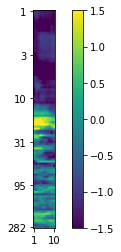

date:180324, rec:008, time:6404.0, label:0.0


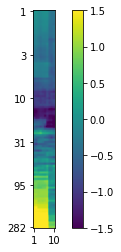

date:180324, rec:003, time:2479.0, label:1.0
date:180322, rec:007, time:4610.0, label:0.0


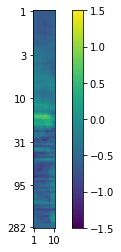

date:180327, rec:001, time:30.0, label:0.0


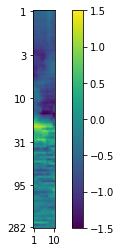

date:180325, rec:007, time:2433.0, label:1.0
date:180325, rec:002, time:4198.0, label:1.0
date:180325, rec:009, time:140.0, label:0.0


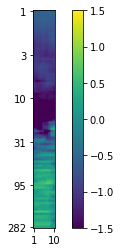

date:180327, rec:001, time:1150.0, label:0.0


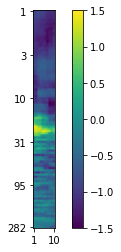

date:180401, rec:001, time:3886.0, label:1.0
date:180326, rec:003, time:5183.0, label:0.0


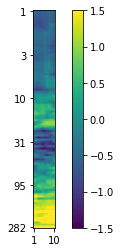

date:180330, rec:005, time:5770.0, label:1.0
date:180325, rec:009, time:1560.0, label:0.0


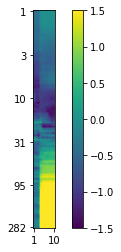

date:180325, rec:006, time:3153.0, label:1.0
date:180327, rec:004, time:4304.0, label:1.0
date:180324, rec:008, time:461.0, label:1.0
date:180326, rec:004, time:5346.0, label:1.0
date:180322, rec:004, time:5296.0, label:1.0
date:180330, rec:009, time:5771.0, label:0.0


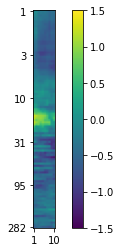

date:180323, rec:006, time:4779.0, label:1.0
date:180324, rec:003, time:4937.0, label:1.0
date:180331, rec:001, time:1360.0, label:0.0


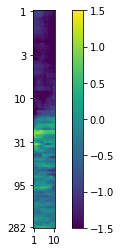

date:180327, rec:008, time:4202.0, label:0.0


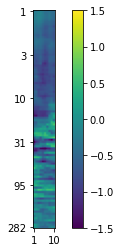

date:180325, rec:009, time:2040.0, label:0.0


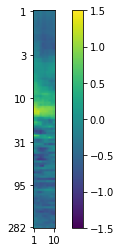

date:180330, rec:005, time:5600.0, label:1.0
date:180329, rec:002, time:1960.0, label:1.0
date:180331, rec:005, time:110.0, label:1.0
date:180326, rec:003, time:1529.0, label:1.0
date:180401, rec:001, time:5763.0, label:1.0
date:180324, rec:008, time:50.0, label:0.0


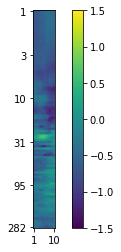

date:180410, rec:006, time:6790.0, label:0.0


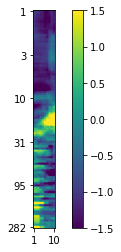

date:180325, rec:009, time:2290.0, label:0.0


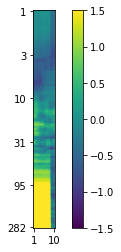

date:180329, rec:001, time:710.0, label:0.0


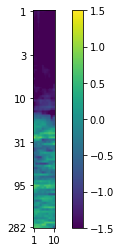

date:180325, rec:009, time:6430.0, label:0.0


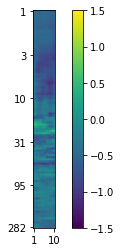

date:180330, rec:009, time:1594.0, label:0.0


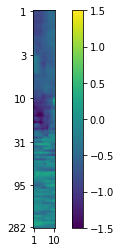

date:180327, rec:007, time:3890.0, label:0.0


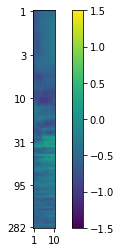

date:180322, rec:007, time:1447.0, label:0.0


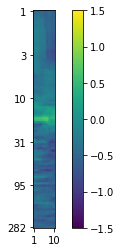

date:180330, rec:009, time:3320.0, label:0.0


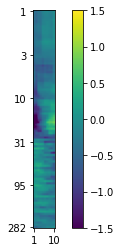

date:180324, rec:001, time:5340.0, label:0.0


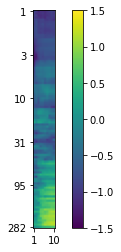

date:180331, rec:001, time:2140.0, label:0.0


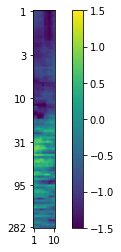

date:180329, rec:002, time:1346.0, label:1.0
date:180410, rec:006, time:4649.0, label:1.0
date:180410, rec:003, time:5058.0, label:1.0
date:180323, rec:002, time:460.0, label:1.0
date:180401, rec:001, time:190.0, label:0.0


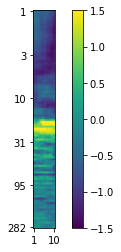

date:180324, rec:008, time:1711.0, label:0.0


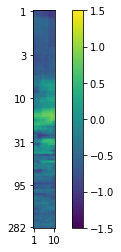

date:180331, rec:005, time:6678.0, label:1.0
date:180325, rec:003, time:3112.0, label:1.0
date:180322, rec:007, time:1547.0, label:0.0


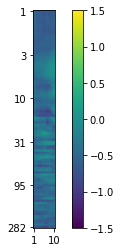

date:180327, rec:005, time:1580.0, label:1.0
date:180327, rec:008, time:4563.0, label:0.0


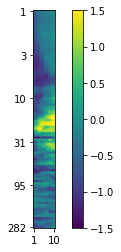

date:180322, rec:003, time:723.0, label:1.0
date:180325, rec:009, time:2916.0, label:1.0
date:180324, rec:001, time:5480.0, label:0.0


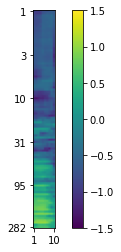

date:180331, rec:007, time:592.0, label:0.0


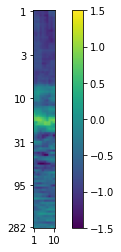

date:180325, rec:009, time:5739.0, label:1.0
date:180330, rec:009, time:1754.0, label:0.0


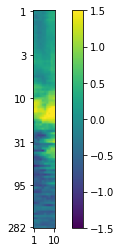

date:180410, rec:006, time:5542.0, label:0.0


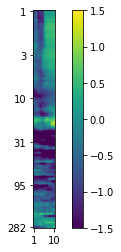

date:180330, rec:005, time:3765.0, label:1.0
date:180329, rec:001, time:1704.0, label:0.0


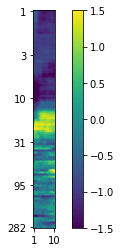

date:180325, rec:009, time:4919.0, label:0.0


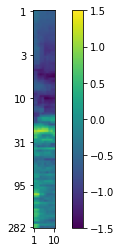

date:180327, rec:006, time:4027.0, label:1.0
date:180401, rec:001, time:7113.0, label:1.0
date:180327, rec:008, time:2952.0, label:0.0


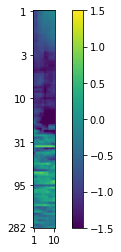

date:180410, rec:003, time:4998.0, label:1.0
date:180331, rec:001, time:3860.0, label:0.0


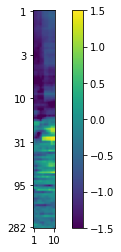

date:180326, rec:004, time:2419.0, label:1.0
date:180330, rec:008, time:5985.0, label:0.0


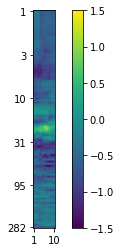

date:180330, rec:008, time:5655.0, label:0.0


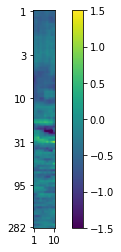

date:180324, rec:008, time:2988.0, label:0.0


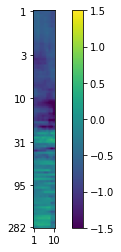

date:180327, rec:008, time:4002.0, label:0.0


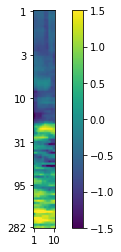

date:180330, rec:008, time:2806.0, label:0.0


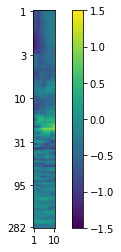

date:180327, rec:004, time:5973.0, label:1.0
date:180325, rec:005, time:3749.0, label:1.0
date:180330, rec:007, time:4230.0, label:1.0
date:180327, rec:002, time:4823.0, label:1.0
date:180325, rec:006, time:2152.0, label:1.0
date:180324, rec:006, time:7093.0, label:0.0


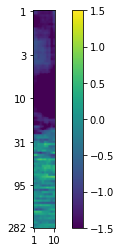

date:180401, rec:001, time:3966.0, label:1.0
date:180401, rec:001, time:770.0, label:0.0


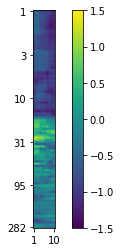

date:180401, rec:001, time:3946.0, label:1.0
date:180329, rec:002, time:1596.0, label:1.0
date:180401, rec:003, time:569.0, label:0.0


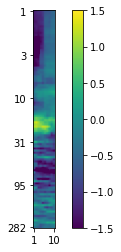

date:180325, rec:007, time:2916.0, label:0.0


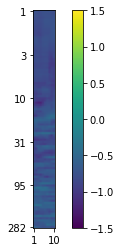

date:180325, rec:006, time:6696.0, label:1.0
date:180327, rec:007, time:4441.0, label:0.0


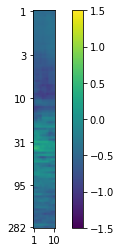

date:180325, rec:003, time:1011.0, label:1.0
date:180327, rec:008, time:2822.0, label:0.0


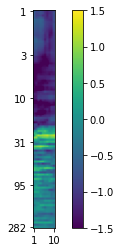

date:180325, rec:006, time:5720.0, label:1.0
date:180323, rec:003, time:3581.0, label:1.0
date:180322, rec:003, time:1423.0, label:1.0
date:180330, rec:006, time:2473.0, label:1.0
date:180327, rec:004, time:2564.0, label:0.0


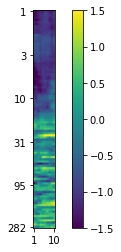

date:180326, rec:003, time:6333.0, label:1.0
date:180325, rec:009, time:4649.0, label:0.0


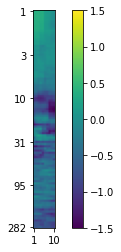

date:180325, rec:007, time:580.0, label:1.0
date:180331, rec:001, time:5717.0, label:1.0
date:180327, rec:008, time:1782.0, label:0.0


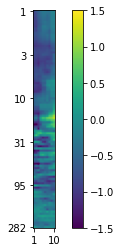

date:180410, rec:004, time:1878.0, label:1.0
date:180325, rec:009, time:1210.0, label:0.0


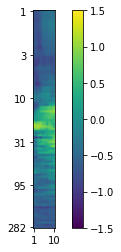

date:180410, rec:006, time:5572.0, label:0.0


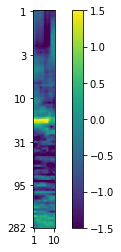

date:180326, rec:003, time:1459.0, label:1.0
date:180410, rec:006, time:5942.0, label:0.0


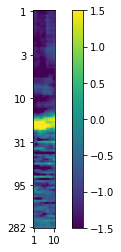

date:180329, rec:001, time:5269.0, label:1.0
date:180330, rec:007, time:2678.0, label:1.0
date:180325, rec:005, time:6233.0, label:1.0
date:180324, rec:008, time:1611.0, label:0.0


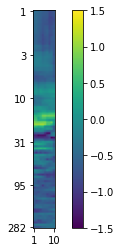

date:180325, rec:009, time:930.0, label:0.0


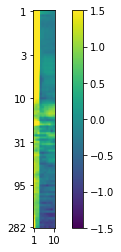

date:180327, rec:001, time:5794.0, label:1.0
date:180324, rec:009, time:1278.0, label:0.0


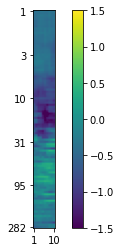

date:180327, rec:007, time:5871.0, label:0.0


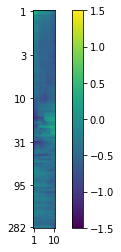

date:180401, rec:002, time:2256.0, label:1.0
date:180330, rec:001, time:510.0, label:0.0


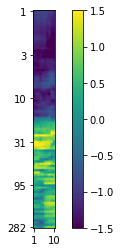

date:180326, rec:004, time:2219.0, label:1.0
date:180331, rec:007, time:3157.0, label:0.0


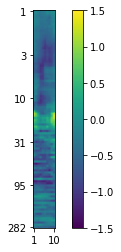

date:180327, rec:007, time:3230.0, label:0.0


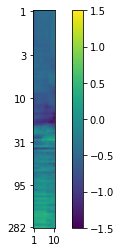

date:180330, rec:009, time:448.0, label:0.0


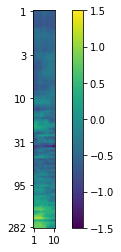

date:180330, rec:004, time:5317.0, label:1.0
date:180401, rec:001, time:5377.0, label:0.0


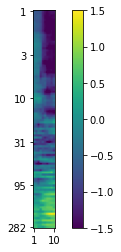

date:180329, rec:005, time:3721.0, label:1.0
date:180323, rec:005, time:3151.0, label:1.0
date:180330, rec:008, time:6505.0, label:0.0


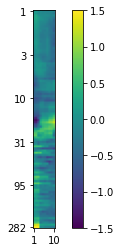

date:180323, rec:001, time:20.0, label:0.0


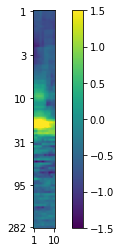

date:180410, rec:003, time:5128.0, label:1.0
date:180327, rec:007, time:2190.0, label:0.0


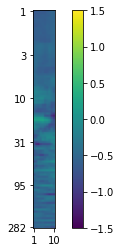

date:180327, rec:001, time:2200.0, label:0.0


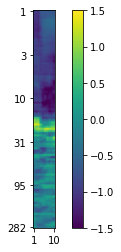

date:180324, rec:001, time:1116.0, label:1.0
date:180330, rec:005, time:582.0, label:1.0


In [5]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, 9], labels=[1, 10])
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

In [54]:
class CNN(nn.Module):
    def __init__(self,p_dropout):
        super(CNN,self).__init__()
    
        # convolutional layer (sees 1x100x10 image tensor)
        self.conv1 = nn.Conv2d(in_channels=62, out_channels=2,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        # convolutional layer (sees 2x50x5 tensor)
        self.conv2 = nn.Conv2d(in_channels=2, out_channels=4,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        # sees a layer 4x25x2
        self.fc1 = nn.Linear(4*25*2,1)
        
        # Max pooling
        self.pool = nn.MaxPool2d(2,2)
        # dropout layer 
        self.dropout = nn.Dropout(p_dropout)
         # batch normalization 
        self.bn1 = nn.BatchNorm2d(2)
        self.bn2 = nn.BatchNorm2d(4)
      
    def forward(self,x):
        
        x = x.float()
        
        conv_x1 = self.conv1(x)
        x = self.pool(F.relu(self.bn1(conv_x1))) # Convolution 1:

        conv_x2 = self.conv2(x)
        x = self.pool(F.relu(self.bn2(conv_x2))) # Convolution 2:

        x = x.view(x.shape[0],-1) # flatten image input
        
        x = self.dropout(x) # dropout
        x = self.fc1(x) # Fully connected layer
        
        return x, conv_x1, conv_x2

In [61]:
learning_rate = 0.001
tol = 0.01
p_dropout = 0.2

num_epochs = 51
model_name = 'CNN'
model_type = 'LR'
alpha = 0
loss_type = 'bce'
reg_type = 'none'
series = '1st_and_2nd'

model = CNN(p_dropout).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.BCELoss(reduction='mean')
model

CNN(
  (conv1): Conv2d(62, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=200, out_features=1, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (bn1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [62]:
(data, labels, _, _, _) = next(iter(train_loader))
data = data.to(device)
output, conv1, conv2 = model(data)
output.shape
criterion

BCELoss()

In [15]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc, conv1, conv2 = train(model, optimizer, criterion, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, criterion, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    if val_loss <= min(val_losses):
        best_epoch = epoch
        print(epoch)
        path = '/home/bijanadmin/Desktop/Goose_data/model/CNN_10_sec_window'
        torch.save(model.state_dict(), '{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
        torch.save(conv1,'{}/conv_layer_1_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
        torch.save(conv2,'{}/conv_layer_2_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
        

Train loss for epoch 0: 0.002780334325507283
Val loss for epoch 0: 0.0019276626408100128
0
Train loss for epoch 1: 0.0016158608486875892
Val loss for epoch 1: 0.0025180026423186064
Train loss for epoch 2: 0.0013875330332666636
Val loss for epoch 2: 0.0023833473678678274
Train loss for epoch 3: 0.0013242416316643357
Val loss for epoch 3: 0.0022701979614794254
Train loss for epoch 4: 0.0012520789168775082
Val loss for epoch 4: 0.0025668649468570948
Train loss for epoch 5: 0.0011928076855838299
Val loss for epoch 5: 0.002102604368701577
Train loss for epoch 6: 0.0011606414336711168
Val loss for epoch 6: 0.0020594787783920765
Train loss for epoch 7: 0.0011282131308689713
Val loss for epoch 7: 0.0022841626778244972
Train loss for epoch 8: 0.0011002217652276158
Val loss for epoch 8: 0.0023407028056681156
Train loss for epoch 9: 0.0010978835634887218
Val loss for epoch 9: 0.0020229974761605263
Train loss for epoch 10: 0.0010798076400533319
Val loss for epoch 10: 0.002397439908236265
Train los

### Load the model and the convolutional layers

In [18]:
epoch = 46
path = '/home/bijanadmin/Desktop/Goose_data/model/CNN_10_sec_window'
# Model class must be defined somewhere
model = torch.load('{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
conv1 = torch.load('{}/conv_layer_1_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
conv2 = torch.load('{}/conv_layer_2_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))

In [63]:
model

CNN(
  (conv1): Conv2d(62, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=200, out_features=1, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (bn1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [37]:
# for name, param in model.named_parameters():
#     if param.requires_grad:
#         print(name, param.data)

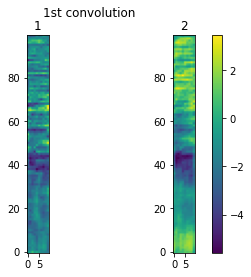

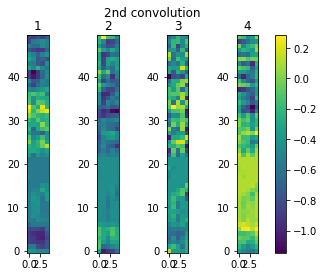

In [21]:
# =============================================================================
#  FILTERS CNN
# =============================================================================
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures/CNN_10_sec_window'

# 1st level
fig, axes = plt.subplots(1, 2)
fig.suptitle('1st convolution')
for i, ax in enumerate(axes.flat):
    img = ax.imshow(torch.detach(conv1[2,i,:,:]).cpu().numpy(),origin='lower')
    ax.set_title('{}'.format(i+1))
plt.colorbar(img, ax=axes.ravel().tolist())
plt.show()
# fig.savefig('{}/1st_convolution_DROPOUT_{}_SERIES_{}.png'.format(path_fig,p_dropout,series))


# 2nd level 
fig, axes = plt.subplots(1, 4)
fig.suptitle('2nd convolution')
for i, ax in enumerate(axes.flat):
    img = ax.imshow(torch.detach(conv2[2,i,:,:]).cpu().numpy(),origin='lower')
    ax.set_title('{}'.format(i+1))
plt.colorbar(img, ax=axes.ravel().tolist())
plt.show()
# fig.savefig('{}/2nd_convolution_DROPOUT_{}_SERIES_{}.png'.format(path_fig,p_dropout,series))

In [31]:
def plot_loss_acc_2(training_losses, val_losses, training_acc, validation_acc, model_name):
    fig = plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.title(model_name, fontsize = 15)
    plt.plot(training_losses, linewidth = 1.5, label = 'train')
    plt.plot(val_losses, linewidth = 1.5, label = 'valid')
    plt.xlabel("Epoch",fontsize = 15)
    plt.ylabel("Loss", fontsize = 15)
    plt.legend()
    plt.subplot(1,2,2)
    plt.title(model_name, fontsize = 15)
    plt.plot(training_acc, linewidth = 1.5, label = 'train')
    plt.plot(validation_acc, linewidth = 1.5, label = 'valid')
    plt.xlabel("Epoch",fontsize = 15)
    plt.ylabel("Accuracy", fontsize = 15)
    plt.legend()
    plt.show()
    return fig

In [32]:
fig = plot_loss_acc_2(training_losses, val_losses, training_acc, validation_acc, 'CNN dropout = 0.2') 

NameError: name 'training_losses' is not defined

In [34]:
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures'
path_fig_model = '/CNN_10_sec_window'

fig.savefig(path_fig + path_fig_model + '/MODEL_{}_CH{}_LOSS{}_DROPOUT{}_EPOCH{}_SERIES_{}.png'.format(model_name,CH,loss_type,p_dropout,epoch,series))
plt.close(fig)

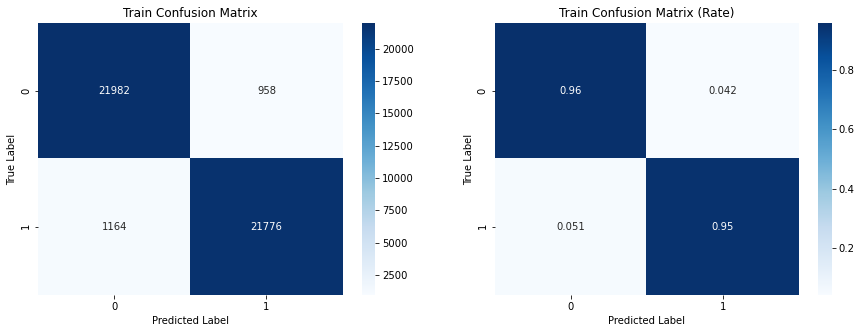

In [44]:
def plot_confusion(test_preds, test_labels,title):
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    cm_test = confusion_matrix(labels_test, predictions_test)
    cm_test_percent = (cm_test.T/cm_test.astype(np.float).sum(axis=1)).T
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    sn.heatmap(cm_test, annot = True,  fmt = 'd', cmap='Blues')
    plt.title('{} Confusion Matrix'.format(title))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.subplot(1,2,2)
    sn.heatmap(cm_test_percent, annot = True, cmap='Blues')
    plt.title('{} Confusion Matrix (Rate)'.format(title))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    return fig

data_set = 'Train'
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures/CNN_10_sec_window'
fig = plot_confusion(train_preds, train_labels,data_set)
fig.savefig('{}/{}_confusion_matrix_CNN_CH_{}_DROPOUT_{}_EPOCH_{}_SERIES_{}.png'.format(path_fig,data_set,CH,p_dropout,epoch,series))

In [135]:
epoch = 46
# model = CNN(p_dropout).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
model.load_state_dict(torch.load('{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series)))

# loader = train_loader
# train_loss, train_acc, train_preds, train_preds_probs, train_labels, _, _, _, cases_wrong_train = evaluate(model, optimizer, criterion, loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
# print('train loss:{}, train accuracy:{}, train percentage postive:{}'.format(train_loss, train_acc, np.mean(np.concatenate(train_labels))))

<All keys matched successfully>

In [138]:
model.parameters

<bound method Module.parameters of CNN(
  (conv1): Conv2d(62, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=200, out_features=1, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (bn1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)>

In [139]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

conv1.weight tensor([[[[ 9.9311e-02,  1.1295e-01, -5.4585e-02],
          [ 1.1370e-01,  4.3584e-02, -1.3408e-01],
          [-4.1367e-03,  8.7553e-02, -1.3619e-01]],

         [[ 1.4787e-01, -4.7888e-02, -2.4558e-01],
          [ 9.5478e-02,  1.6382e-01, -3.0257e-02],
          [ 9.1792e-03,  3.2372e-02, -9.4015e-02]],

         [[-1.4868e-04,  5.9416e-02,  3.2723e-02],
          [-2.7026e-02, -2.4979e-01,  3.9770e-02],
          [-1.2420e-01, -1.5079e-01,  4.5844e-02]],

         ...,

         [[-5.4887e-02, -5.7478e-02, -6.0406e-02],
          [ 1.6695e-01, -7.1705e-02,  5.2436e-02],
          [ 8.0018e-02,  5.0139e-02,  1.0651e-02]],

         [[-5.9140e-02,  8.4313e-03, -5.1752e-02],
          [ 5.9985e-02, -1.3171e-01, -6.0556e-02],
          [ 1.1369e-01,  2.0494e-02, -2.5877e-02]],

         [[-1.4065e-01,  2.3590e-02, -1.3439e-02],
          [ 5.6627e-02, -1.2372e-01, -5.1974e-02],
          [ 1.1496e-01,  7.6473e-02, -2.1936e-02]]],


        [[[ 2.9028e-02, -1.1164e-03, -5.

In [143]:
model.conv1

Conv2d(62, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [99]:
output, convA, convB = model(data)
data.shape

torch.Size([128, 62, 100, 10])

In [104]:
y_NN.argmax()

AttributeError: 'tuple' object has no attribute 'argmax'

In [132]:
x, y,_,_,_ = next(iter(test_loader))
x = x.resize(128,62,10,100).to(device)

x.requires_grad_()

# Retrieve output from the image
output,_,_ = model(x)

# Catch the output
output_idx = output.argmax()
output_max = output[0, output_idx]

# Do backpropagation to get the derivative of the output based on the image
output_max.backward()


# pred = y_NN
# y_NN = y_NN[:,y_NN.argmax()]
# model.zero_grad()
# y_NN.backward()

# saliency = (x.grad[0,0]).cpu().detach().numpy()
# x = (x[0,0]).cpu().detach().numpy()

# plt.figure()
# plt.subplot(121)
# plt.imshow(x)
# # plt.title('ypred= ' + str(pred.argmax().item()))
# plt.subplot(122)
# plt.imshow(abs(saliency))

IndexError: index 104 is out of bounds for dimension 1 with size 1

In [134]:
output.shape[]

torch.Size([128, 1])